In [1]:
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import re


In [2]:
# Load the sample data from ./sample_data/
data_dir = "./sample_data/"
data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f))]
data_files

['./sample_data/hyper_advanced.txt',
 './sample_data/bonus_1.txt',
 './sample_data/advanced.txt',
 './sample_data/basic.txt']

In [3]:
raw_contents = [] # list of lists (agent name, data string)
for data_file in data_files:
    f = open(data_file, mode="r")
    contents = f.read()
    agent_name = data_file[data_file.find("a/")+2:-4]
    raw_contents.append([agent_name, contents])
raw_contents

[['hyper_advanced',
  'BOMB_COUNT = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\n\tagent = hyper_advanced, dim = 20, bomb_count = 0, score = 0\nBOMB_COUNT = 40\n\tagent = hyper_advanced, dim = 20, bomb_count = 40, score = 40\n\tagent = hyper_advanced, dim = 20, bomb_count = 40, score = 40\n\tagent = hyper_advanced, dim = 20, bomb_count = 40, score = 38\n\tagent = hyper_advanced, dim = 20, bomb_count = 40, score = 40\n\tagent = hyper_advanced, dim = 20, bomb_count = 40, s

In [4]:
# Regex match
parsed_data = {} # key = agent name, value = parsed data
for raw_content in raw_contents:
    agent_name, lines = raw_content
    lines = lines.split("\n")
    agent_data = {}
    curr_bomb_count = -1
    for line in lines:
        # extract bomb count #
        matches = re.findall(r"BOMB_COUNT = (\d+)", line)
        if len(matches) != 0:
            curr_bomb_count = int(matches[0])
            agent_data[curr_bomb_count] = []
            continue
        
        
        # extract score sample
        matches = re.findall(r".+?(?=bomb_count)bomb_count = (\d+), score = (\d+)", line)
        if len(matches) > 0:
            max_score, actual_score = matches[0]
            agent_data[curr_bomb_count].append(int(actual_score))
                
    # add agent data to parsed data
    parsed_data[agent_name] = agent_data

parsed_data

{'hyper_advanced': {0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  40: [40, 40, 38, 40, 40, 40, 40, 40, 40, 40],
  80: [79, 78, 77, 78, 79, 78, 78, 79, 79, 80],
  120: [100, 104, 103, 112, 99, 110, 107, 112, 104, 103],
  160: [125, 116, 120, 118, 118, 127, 125, 128, 108, 112],
  200: [125, 142, 123, 132, 115, 133, 138, 132, 130, 118],
  240: [119, 112, 106, 109, 132, 118, 133, 132, 141, 120],
  280: [137, 125, 122, 134, 123, 113, 124, 136, 151, 127],
  320: [114, 127, 122, 150, 97, 86, 136, 132, 114, 106],
  360: [94, 93, 90, 80, 75, 68, 91, 82, 92, 70],
  400: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 'bonus_1': {0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  40: [40, 40, 40, 39, 40, 40, 40, 40, 40, 40],
  80: [77, 78, 77, 74, 78, 80, 79, 80, 74, 80],
  120: [105, 100, 103, 99, 111, 102, 111, 92, 109, 107],
  160: [113, 119, 121, 112, 113, 112, 108, 108, 124, 115],
  200: [121, 124, 117, 109, 124, 133, 124, 146, 130, 106],
  240: [122, 119, 111, 135, 120, 117, 128, 118, 128, 125],
  280: [121, 113, 124, 123, 156

In [5]:
# now that we have the actual scores for each bomb_count for each agent, we need to convert make a dict,
# matching agent name to a list of (total_score / total_max_score)
score_percentages = {}
for agent_name in parsed_data.keys():
    curr_percentages = []
    for max_score in parsed_data[agent_name].keys():
        if max_score == 0:
            curr_percentages.append(1.0)
        else:
            scores = parsed_data[agent_name][max_score]
            total_score = sum(scores)
            total_max_score = max_score * len(scores)
            curr_percentages.append(total_score / total_max_score)
    score_percentages[agent_name] = curr_percentages

score_percentages

{'hyper_advanced': [1.0,
  0.995,
  0.98125,
  0.8783333333333333,
  0.748125,
  0.644,
  0.5091666666666667,
  0.4614285714285714,
  0.37,
  0.23194444444444445,
  0.0],
 'bonus_1': [1.0,
  0.9975,
  0.97125,
  0.8658333333333333,
  0.715625,
  0.617,
  0.5095833333333334,
  0.46285714285714286,
  0.394375,
  0.26805555555555555,
  0.9975],
 'advanced': [1.0,
  0.99,
  0.96875,
  0.87,
  0.736875,
  0.6185,
  0.5204166666666666,
  0.4567857142857143,
  0.35125,
  0.25166666666666665,
  0.0],
 'basic': [1.0,
  0.9825,
  0.9475,
  0.7575,
  0.64625,
  0.5445,
  0.48541666666666666,
  0.4275,
  0.3571875,
  0.23694444444444446,
  0.0]}

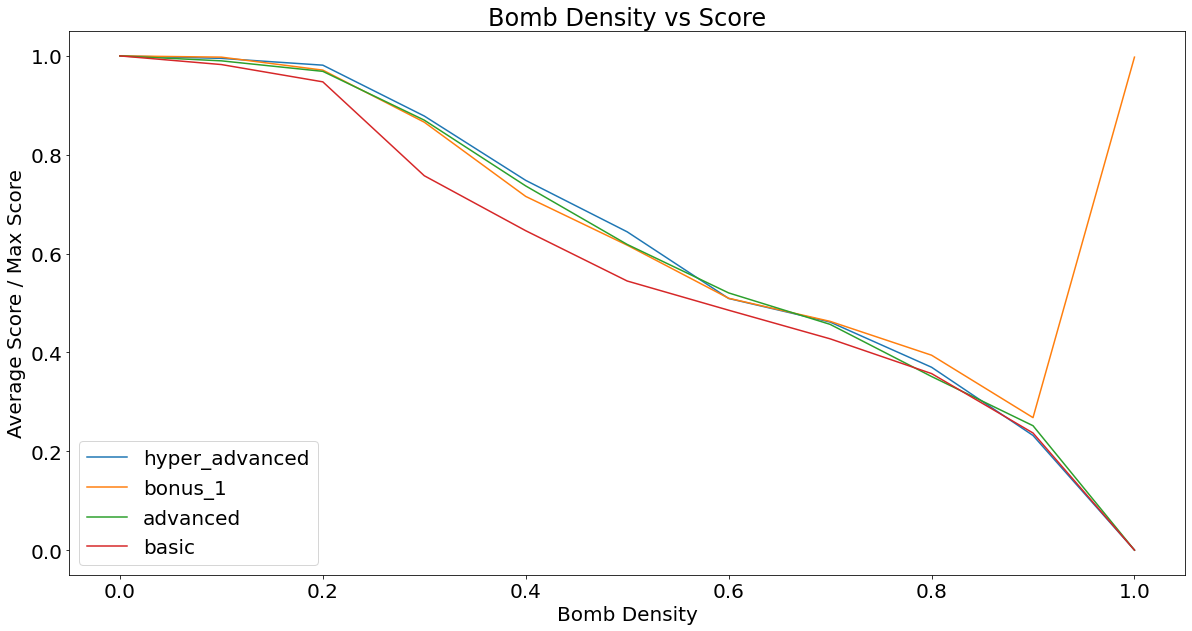

In [6]:
# Plot the data.
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = "20"
plt.xlabel("Bomb Density")
plt.ylabel("Average Score / Max Score")
for name, y_axis in score_percentages.items():
    densities = [x / max(parsed_data[agent_name].keys()) for x in parsed_data[agent_name].keys()]
    plt.plot(densities, y_axis, label=name)

plt.title("Bomb Density vs Score")
plt.legend()